# Laboratory 4

# Variant 5

This notebook is dedicated to lab 4 of EARIN, in this case, variant 5, which involves a supervised learning task, using a classification learning algorithm to develop a machine learning model to predict which class a wine belongs to, given certain features of the wine. Let's start by loading the required libraries, set seed function, and the function that will load the data for us.

In [81]:
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split

from datasets import load_dataset


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)

Now we will import the data using the function defined in the datasets file, in our case, the argument passed is "wine", which will return two DataFrames, X for the input features, and y for the targets

In [82]:
seed=42
set_seed(seed)
X, y = load_dataset("wine")

Let's take a look at each one and see what they look like, to do so, we will use the head() method

In [83]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [84]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

Let's get more info about our dataset, to be able to know more about the different features and how big our dataset is:

In [85]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

Our dataset seems to be rather small! This implies some careful considerations to be made when we decide to create our train-test split, mainly that the distribution of our training and testing sets must be similar to how the dataset is distributed. To this end, we may decide to use stratified samplying rather than choosing the random approach in order to ensure that the distribution is maintained. There are no features with null entries, which is good.

We see that X contains the different features of a specific wine, while y contains the class it belongs to. A picture is worth a thousand words, so let's check the distribution of our features. 

array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'malic_acid'}>,
        <Axes: title={'center': 'ash'}>,
        <Axes: title={'center': 'alcalinity_of_ash'}>],
       [<Axes: title={'center': 'magnesium'}>,
        <Axes: title={'center': 'total_phenols'}>,
        <Axes: title={'center': 'flavanoids'}>,
        <Axes: title={'center': 'nonflavanoid_phenols'}>],
       [<Axes: title={'center': 'proanthocyanins'}>,
        <Axes: title={'center': 'color_intensity'}>,
        <Axes: title={'center': 'hue'}>,
        <Axes: title={'center': 'od280/od315_of_diluted_wines'}>],
       [<Axes: title={'center': 'proline'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

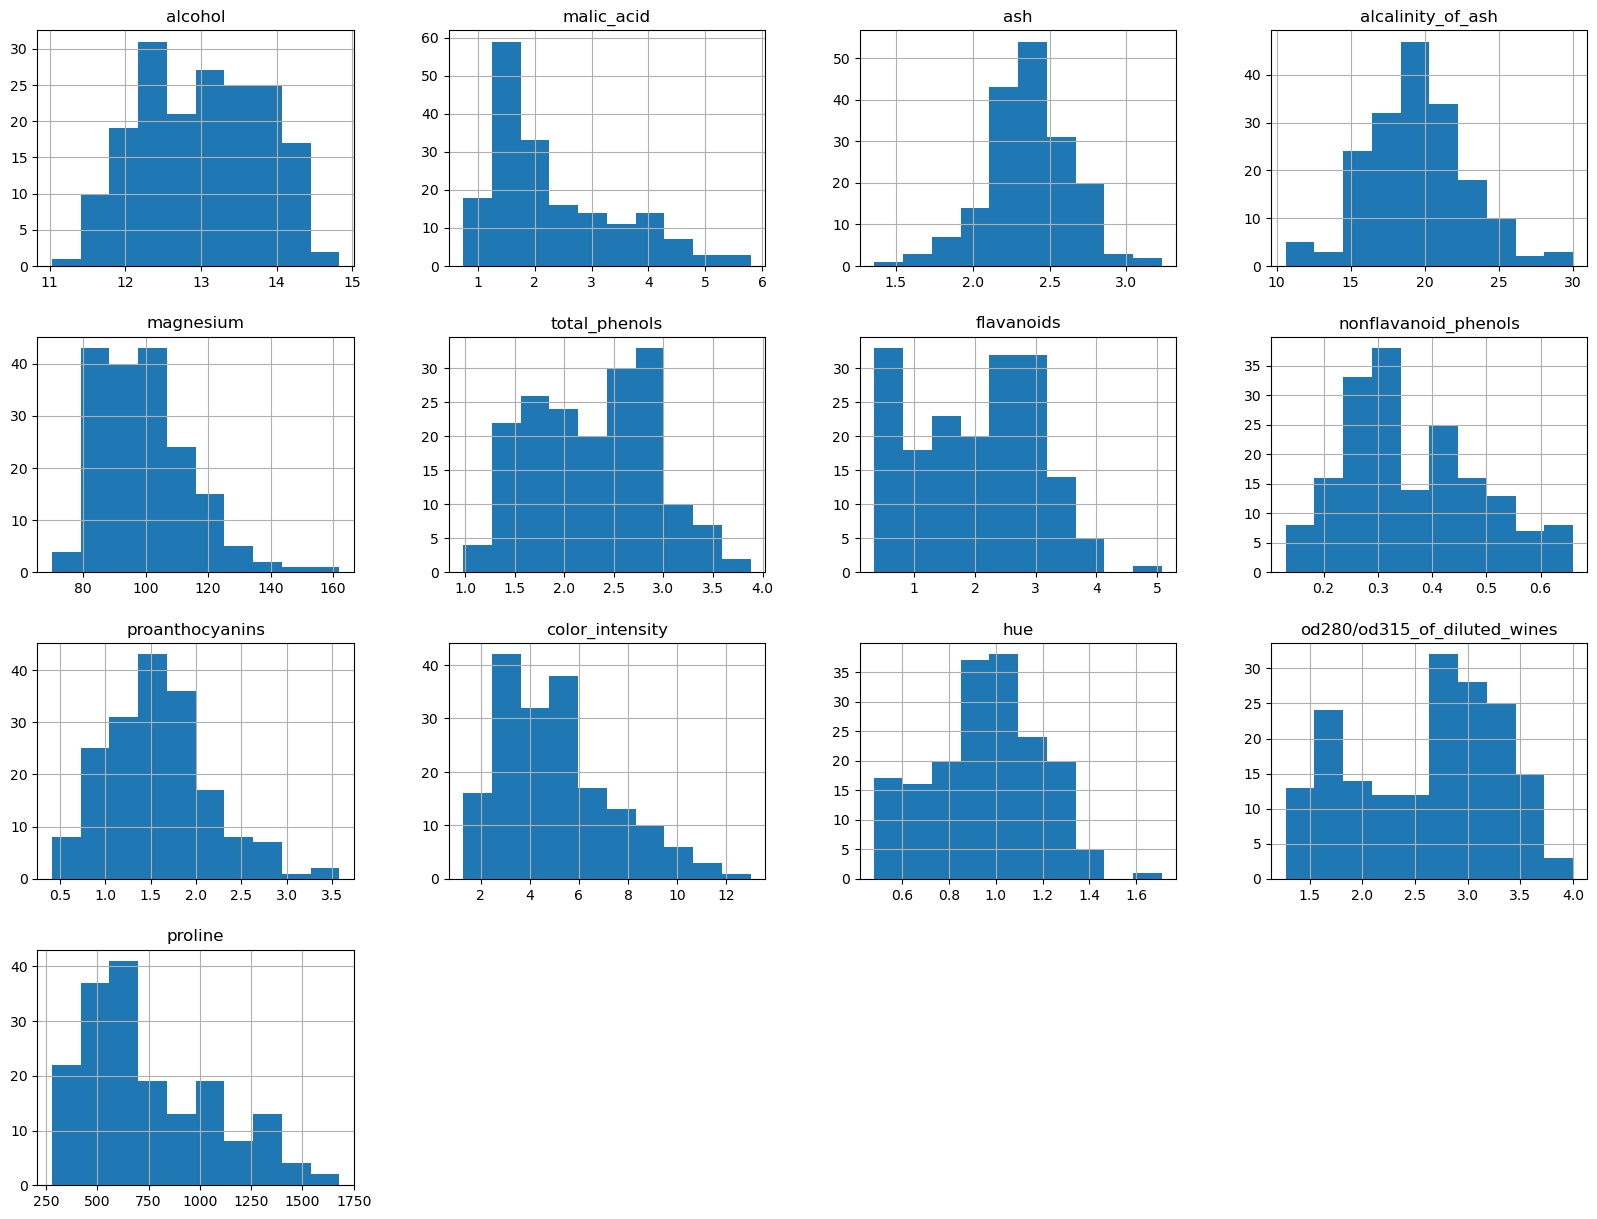

In [108]:
X.hist(figsize=(20, 15))

We can see that some features do have a tail heavy distribution, as well as the fact that the scales are vastly different depending on the feature being observed. This once again implies that it will best to use stratified sampling when it comes to creating our train-test splits.

Before moving on to anything else! Let's create our train-test splits now! First, let's take a look at the distribution of our y variable, which contains the targets (categories of wine).

In [87]:
y.value_counts() / len(y)

target
1    0.398876
0    0.331461
2    0.269663
Name: count, dtype: float64

Let's see at how our distribution looks if we choose random sampling.

In [88]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=seed
)

Let's now take a look at the distributions of our training and testing datasets

In [89]:
y_train.value_counts() / len(y_train)

target
1    0.401408
0    0.316901
2    0.281690
Name: count, dtype: float64

In [90]:
y_test.value_counts() / len(y_test)

target
0    0.388889
1    0.388889
2    0.222222
Name: count, dtype: float64

What do we find here? Well we see that the distribution of our training and testing splits are not the same as the distribution of our dataset, and given that our dataset is small, this will become a source of problems for our learning algorithm. Let's see if we can improve this by using stratified sampling. Since we are working with categorical data, this makes our life much easier.

In [91]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=seed)

for train_index, test_index in split.split(X, y):
    X_strat_train = X.loc[train_index]
    X_strat_test = X.loc[test_index]
    y_strat_train = y.loc[train_index]
    y_strat_test = y.loc[test_index]

Let's now take a look at how the distribution looks

In [92]:
y_strat_test.value_counts() / len(y_strat_test)

target
1    0.388889
0    0.333333
2    0.277778
Name: count, dtype: float64

In [93]:
y_strat_train.value_counts() / len(y_strat_train)

target
1    0.401408
0    0.330986
2    0.267606
Name: count, dtype: float64

We can see here that there is a significant improvement in the distribution of our categories in the train-test sets, in the sense that they are much more similar to the actual dataset. Let's put everything into a table to get an idea of the improvement we have obtained:

In [94]:
pd.DataFrame(((y.value_counts() / len(y)).to_numpy(), (y_train.value_counts() / len(y_train)).to_numpy(), (y_strat_train.value_counts() / len(y_strat_train)).to_numpy()))

,0,1,2
0,0.398876,0.331461,0.269663
1,0.401408,0.316901,0.281690
2,0.401408,0.330986,0.267606


Where the rows represent dataset distribution, random sampling distribution, and stratified sampling distribution, respectively, for each category.

With the train-test sets now created, we may go ahead with thinking about what there is to be done, let's take a look at our input features once again.

In [95]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


An attribute such as "nonflavanoid_phenols" is already being represented in the "total_phenols". So it may make sense to experiment with this. Another attribute we may think about excluding is the hue. Before we begin exploring the data though, let's first consider creating a copy of it so that we are able to freely explore without modifying the original dataset, for now, we will explore the X dataset, which contains our input features.

In [96]:
X_copy = X.copy()

One way to gain insight about the data we are working with is to consider the correlation matrix, let's take a look at that.

In [97]:
corr_matrix = X_copy.corr()
corr_matrix

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


One thing to be careful of here is the fact that correlation does not imply causation, so it is important not to over rely on it. With the current data that we have, there really isn't much to derive from the correlation matrix. Especially considering that this is a classification task. Still, the previous idea we had about dropping the nonflavanoid_phenols may be worth experimenting with.

When it comes to picking a learning algorithm, we need to consider that our classification task involves multiple classes, in which case it is important to keep that in mind, as then the choice is between choosing classifiers that support multiclass classifications, or ones that don't but can still be made to work with our case. 

For example, a binary classifier such as the Stochastic Gradient Descent Classfier or SVM classifier can work with our dataset by essentially creating as many binary classifiers as there are classes, or create a classifier for each pair of classes. The implication with using either approach is which decision method is used to pick which classifier's output is the correct one, as there exists two approaches, one versus all (OvA) and one versus one (OvO), typically, SVM classifiers use OvO while a Stochastic Gradient Descent Classifiers use OvA, and OvA is the one to be used for the majority of binary classifiers.

With the above in mind, we will consider the following classifiers:
* Random Forest Classifier (Multiclass Classifier)
* Stochastic Gradient Descent Classifier (Binary classifier using OvA)
* SVM Classifier (Binary classifier using OvO)

Then comes the question, what can we use to compare between the models? The choice for a performance measure matters quite a lot. For instance, suppose that we choose a simple performance measure, such as the ratio of correct classifications to all classifications (correct + incorrect). While we may think this will get us a clear picture about how the model performs, but in reality it wouldn't, because such a performance measure relies too heavily on the dataset, and what percentage of the dataset each class makes up. We looked at the distribution of our dataset previously and noticed that category 2 made up approximately 28% of the samples. A "dumb" binary Classifier may be designed that simply classifies everything as "not-2" and will get predictions right 72% of the time! (Given that we have multiple class, such a binary classifier wouldn't be the only one in our case, whether in OvA or OvO approach, but the purpose of this example is to show that the performance measure mentioned above wouldn't suffice.)

To this end, we will instead choose the $F_{1}$ performance measure to compare between models, and then analyze the precision and recall (sensitivity) of the best performing model in depth. The formula for the $F_{1}$ performance measure is as follows: $$F_{1}= \frac{2}{\frac{1}{\text{precision}} + \frac{1}{\text{recall}}}= 2 \times \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}} = \frac{\text{TP}}{\text{TP} + \frac{\text{FN} + \text{FP}}{2}}$$
Where:

TP is "True Positives", i.e. the number of correctly predicted samples that belong to the predicted class.

FN is "False Negatives", i.e. the number of samples that were predicted as not belonging to a class, but in fact do.

FP is "False Positives", i.e. the number of incorrectly identified samples that were predicted to belong to a class, but in fact don't.

In its essence, what the $F_{1}$ performance measure describes, is how similar the recall and sensitivity are, because the nature of the relationship between these two measures is inversely correlated.

Before we pass our training data to a learning algorithm, we will first need to perform normalization on our dataset. As we observed earlier, we noticed that the scales vary massively depending on the input feature being considered, thus, we will need to normalize the data into a consistent scale across all the attributes.  

In [98]:
from sklearn.preprocessing import normalize

X_strat_train_normalized = normalize(X_strat_train)
X_strat_test_normalized = normalize(X_strat_test)
X_normalized_df = pd.DataFrame(X_strat_train_normalized, columns=X_strat_train.columns)
X_normalized_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.014970,0.001849,0.003201,0.017472,0.123997,0.002931,0.003021,0.000383,0.001533,0.005185,0.001229,0.003134,0.991979
1,0.010650,0.001163,0.002094,0.017452,0.078339,0.002327,0.002521,0.000225,0.001846,0.004421,0.000923,0.002102,0.996694
2,0.011169,0.001476,0.002185,0.013430,0.077576,0.002377,0.002452,0.000284,0.001210,0.004004,0.000767,0.002686,0.996811
3,0.010392,0.001307,0.001821,0.012092,0.067262,0.001965,0.002086,0.000219,0.001368,0.004232,0.000869,0.002192,0.997589
4,0.020273,0.004931,0.003622,0.032723,0.140022,0.002937,0.001157,0.000685,0.001902,0.012815,0.000837,0.002466,0.989287


Awesome! Now our data is ready to be passed to our models! We will use the Macro-Average F1 score, as this works best for datasets that are not equally distributed. (Which is practically all real life datasets)

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

random_forest = RandomForestClassifier(random_state=seed)
SG_classifier = OneVsRestClassifier(SGDClassifier(random_state=seed))
SVM_classifier = OneVsOneClassifier(SVC(random_state=seed))
forest_score = cross_val_score(random_forest, X_strat_train_normalized, y_strat_train, cv=4, scoring='f1_macro')
SG_score = cross_val_score(SG_classifier, X_strat_train_normalized, y_strat_train, cv=4, scoring='f1_macro')
SVM_score = cross_val_score(SVM_classifier, X_strat_train_normalized, y_strat_train, cv=4, scoring='f1_macro')
best_scores = np.array((forest_score.max(), SG_score.max(), SVM_score.max()))
pd.DataFrame((["Random Forest", "SGDClassifier (OvA)", "SVM Classifier (OvO)"], best_scores))

,0,1,2
0,Random Forest,SGDClassifier (OvA),SVM Classifier (OvO)
1,1.0,0.57967,0.196078


Considering that the Random Forest Classifier had the best F1 score, which was 1, we will take a closer look at it and see what we can learn about its recall and precision scores. In order to do this, we will need to analyze it on a deeper level. Using the cross_val_predict function, we will obtain a set of predictions, and then evaluate the individual scores based on these predictions.

In [100]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score

y_train_predictions = cross_val_predict(random_forest, X_strat_train_normalized, y_strat_train, cv=4)
precision = precision_score(y_strat_train, y_train_predictions, average='macro')
precision

0.9523192528511677

In [101]:
recall = recall_score(y_strat_train, y_train_predictions, average='macro')
recall

0.955331591389822

Quite impressive! Our model performs well with a precision of 95.2% (probability of classifying a given set of input features into the correct category), and has a recall score of 95.5% (probability that the model will classify a sample as positively belonging to a specific class)

Before we test our model on the testing set, there is one last thing to do, which is to fine-tune the hyperparameters of the model. While this can be done manually, it tedious and time-consuming. Instead, an automated method such as the Grid Search method will be used. The main parameters that will be tuned are the number of estimators and the bootstrap value. We will be interested in finding the best parameters that yield the best scores.

In [102]:
from sklearn.model_selection import GridSearchCV

params = [
    {'n_estimators': [x*10 for x in range(1, 20)], 
    'bootstrap': [True, False]} 
]

search_precision = GridSearchCV(random_forest,
                      params,
                      cv=4,
                      scoring='f1_macro',
                      return_train_score=True)

search_precision.fit(X_strat_train_normalized, y_strat_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'bootstrap': [True, False],
                          'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                           100, 110, 120, 130, 140, 150, 160,
                                           170, 180, 190]}],
             return_train_score=True, scoring='f1_macro')

In [103]:
search_precision.best_params_

{'bootstrap': False, 'n_estimators': 60}

We find here that using grid search, we obtained the above parameters. Let's adjust the parameters of our model and see how the precision and recall scores change.

In [104]:
random_forest = RandomForestClassifier(n_estimators=60, bootstrap=False, random_state=seed)

y_train_predictions = cross_val_predict(random_forest, X_strat_train_normalized, y_strat_train, cv=4)
precision = precision_score(y_strat_train, y_train_predictions, average='macro')
precision

0.9641821946169772

In [105]:
recall = recall_score(y_strat_train, y_train_predictions, average='macro')
recall

0.9682717431877567

It seems that we have infact have better results! Let's run our model on the testing set now.

In [106]:

Model = random_forest.fit(X_strat_train_normalized, y_strat_train)
predictions = Model.predict(X_strat_test_normalized)
model_precision = precision_score(y_strat_test, predictions, average='macro')
model_recall = recall_score(y_strat_test, predictions, average='macro')
model_precision

1.0

In [107]:
model_recall

1.0

Well, this is certainly interesting. It seems that either the model has 100% accuracy, or something went terribly wrong.